In [43]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor

env = gym.make("Acrobot-v1", render_mode="rgb_array")
env = Monitor(env, filename="ppo.log")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)
model.save("ppo")

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | -500     |
| time/              |          |
|    fps             | 4883     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | -499        |
| time/                   |             |
|    fps                  | 3493        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008180695 |
|    clip_fraction        | 0.0307      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_varia

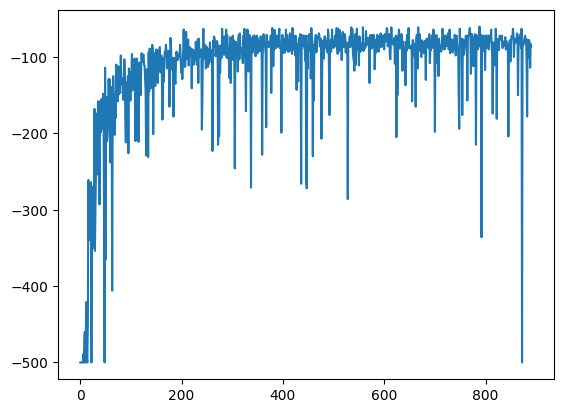

In [45]:
plt.plot(env.get_episode_rewards())

In [51]:
env = make_vec_env("Acrobot-v1", n_envs=1)
obs = env.reset()

for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render("human")


KeyboardInterrupt: 